# Seminar - Phân tích dữ liệu thông minh
## Đề tài: Kaggle Competition - House Prices - Advanced Regression Techniques
## Nhóm 12:
- Nguyễn Văn Quang Hưng - 21120247
- Chiêm Bỉnh Nguyên
- Mai đăng Đức Tài
- Trần Nam Phương
- Thành Trung
- Trần Trình



### 1. Thu thập dữ liệu

- Dữ liệu được nhóm sử dụng là dữ liệu được cung cấp cho người tham gia cuộc thi có đề tài [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

- Dữ liệu bao gồm 4 file: train.csv, test.csv, sample_submission.csv, data_description.txt

- Ý nghĩa của các cột dữ liệu
    - SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

    - MSSubClass: The building class

    - MSZoning: The general zoning classification

    - LotFrontage: Linear feet of street connected to property

    - LotArea: Lot size in square feet

    - Street: Type of road access

    - Alley: Type of alley access

    - LotShape: General shape of property

    - LandContour: Flatness of the property

    - Utilities: Type of utilities available

    - LotConfig: Lot configuration

    - LandSlope: Slope of property

    - Neighborhood: Physical locations within Ames city limits

    - Condition1: Proximity to main road or railroad

    - Condition2: Proximity to main road or railroad (if a second is present)

    - BldgType: Type of dwelling

    - HouseStyle: Style of dwelling

    - OverallQual: Overall material and finish quality

    - OverallCond: Overall condition rating

    - YearBuilt: Original construction date

    - YearRemodAdd: Remodel date

    - RoofStyle: Type of roof

    - RoofMatl: Roof material

    - Exterior1st: Exterior covering on house

    - Exterior2nd: Exterior covering on house (if more than one material)

    - MasVnrType: Masonry veneer type

    - MasVnrArea: Masonry veneer area in square feet

    - ExterQual: Exterior material quality

    - ExterCond: Present condition of the material on the exterior

    - Foundation: Type of foundation

    - BsmtQual: Height of the basement

    - BsmtCond: General condition of the basement

    - BsmtExposure: Walkout or garden level basement walls

    - BsmtFinType1: Quality of basement finished area

    - BsmtFinSF1: Type 1 finished square feet

    - BsmtFinType2: Quality of second finished area (if present)

    - BsmtFinSF2: Type 2 finished square feet

    - BsmtUnfSF: Unfinished square feet of basement area

    - TotalBsmtSF: Total square feet of basement area

    - Heating: Type of heating

    - HeatingQC: Heating quality and condition

    - CentralAir: Central air conditioning

    - Electrical: Electrical system

    - 1stFlrSF: First Floor square feet

    - 2ndFlrSF: Second floor square feet

    - LowQualFinSF: Low quality finished square feet (all floors)

    - GrLivArea: Above grade (ground) living area square feet

    - BsmtFullBath: Basement full bathrooms

    - BsmtHalfBath: Basement half bathrooms

    - FullBath: Full bathrooms above grade

    - HalfBath: Half baths above grade

    - Bedroom: Number of bedrooms above basement level

    - Kitchen: Number of kitchens

    - KitchenQual: Kitchen quality

    - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

    - Functional: Home functionality rating

    - Fireplaces: Number of fireplaces

    - FireplaceQu: Fireplace quality

    - GarageType: Garage location

    - GarageYrBlt: Year garage was built

    - GarageFinish: Interior finish of the garage

    - GarageCars: Size of garage in car capacity

    - GarageArea: Size of garage in square feet

    - GarageQual: Garage quality

    - GarageCond: Garage condition

    - PavedDrive: Paved driveway

    - WoodDeckSF: Wood deck area in square feet

    - OpenPorchSF: Open porch area in square feet

    - EnclosedPorch: Enclosed porch area in square feet

    - 3SsnPorch: Three season porch area in square feet

    - ScreenPorch: Screen porch area in square feet

    - PoolArea: Pool area in square feet

    - PoolQC: Pool quality

    - Fence: Fence quality

    - MiscFeature: Miscellaneous feature not covered in other categories

    - MiscVal: $Value of miscellaneous feature

    - MoSold: Month Sold

    - YrSold: Year Sold

    - SaleType: Type of sale

    - SaleCondition: Condition of sale

In [642]:
#import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [643]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)


In [644]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

### 2. Tổng quan về bộ dữ liệu

In [645]:
print('Bộ dữ liệu train gồm có {} dòng và {} cột'.format(train_df.shape[0], train_df.shape[1]))
print('Bộ dữ liệu test gồm có {} dòng và {} cột'.format(test_df.shape[0], test_df.shape[1]))

Bộ dữ liệu train gồm có 1460 dòng và 81 cột
Bộ dữ liệu test gồm có 1459 dòng và 80 cột


In [646]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [647]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [648]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [649]:
test_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [650]:
print('Bộ dữ liệu train có {} cột số và {} cột category'.format(train_df.select_dtypes(include=['int64', 'float64']).shape[1], train_df.select_dtypes(include=['object']).shape[1]))
print('Bộ dữ liệu test có {} cột số và {} cột category'.format(test_df.select_dtypes(include=['int64', 'float64']).shape[1], test_df.select_dtypes(include=['object']).shape[1]))

Bộ dữ liệu train có 38 cột số và 43 cột category
Bộ dữ liệu test có 37 cột số và 43 cột category


### 3. Tiền xử lí dữ liệu

- Đầu tiên, nhóm sẽ tiến hành kiểm tra xem dữ liệu có bị trùng hay không?

In [651]:
#Kiểm tra giá trị trùng
print('Số dòng bị trùng trong bộ dữ liệu train: ', train_df.duplicated().sum())

Số dòng bị trùng trong bộ dữ liệu train:  0


- Sau khi kiểm tra thì nhóm nhận thấy không có dòng nào bị trùng

In [652]:
def missing_ratio(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    dtypes = df.dtypes
    return pd.concat([total, percent, dtypes], axis=1, keys=['Total', 'Percent', 'Dtypes'])
ms = missing_ratio(train_df)
ms = ms[ms['Percent'] > 0]
ms.reset_index(inplace=True)
ms.columns = ['Columns', 'Total', 'Percent', 'Dtypes']
ms

,Columns,Total,Percent,Dtypes
0,PoolQC,1453,99.520548,object
1,MiscFeature,1406,96.301370,object
2,Alley,1369,93.767123,object
3,Fence,1179,80.753425,object
4,MasVnrType,872,59.726027,object
5,FireplaceQu,690,47.260274,object
6,LotFrontage,259,17.739726,float64
7,GarageYrBlt,81,5.547945,float64
8,GarageCond,81,5.547945,object
9,GarageType,81,5.547945,object


- Có thể thấy bộ dữ liệu có rất nhiều cột có chưa giá trị bị thiếu, nhưng nếu đọc qua tài liệu `data_description.txt` được đính kèm trong dữ liệu được cung cấp thì ta có thể nhận thấy các giá trị bị thiếu này có ý nghĩa trong bộ dữ liệu (ví dụ như giá trị NA ở cột PoolQC có nghĩa là không có hồ bơi hay giá trị NA ở BsmtQual nghĩa là không có tầng hầm) nên nhóm quyết định sẽ không loại bỏ các cột này mà tiến hành xử lí theo ý nghĩa các cột tương ứng

    - Đầu tiên nhóm sẽ xử lí các cột ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] bằng cách thay các giá trị bị thiếu bằng giá trị 'No Item'

In [653]:
missing_item = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
train_df[missing_item] = train_df[missing_item].fillna('No Item')
test_df[missing_item] = test_df[missing_item].fillna('No Item')

    - Tiếp theo, nhóm sẽ xử lí các cột dữ liệu phân loại còn lại bằng giá trị mode của các cột đó

In [654]:
missing_categorical = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']
train_df[missing_categorical] = train_df[missing_categorical].fillna(train_df.mode().iloc[0])
test_df[missing_categorical] = test_df[missing_categorical].fillna(test_df.mode().iloc[0])

    - Tiếp theo, nhóm sẽ xử lí các cột số, bằng cách xử lí Interative Imputer với mô hình Random Forest Regressor, mô hình này có thể giúp ta dự đoán giá trị thiếu dựa trên các cột khác.

In [655]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [656]:
missing_numerical = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)
train_df[missing_numerical] = imputer.fit_transform(train_df[missing_numerical])
test_df[missing_numerical] = imputer.transform(test_df[missing_numerical])

c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [657]:
train_df.isnull().sum().sum(), test_df.isnull().sum().sum()

(0, 0)

### 4. Khám phá dữ liệu 

#### 4.1 Dữ liệu số

In [660]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.500,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000,70.00,190.0
LotFrontage,1460.0,70.217991,22.724543,21.0,60.00,69.995,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000,2004.00,2010.0
MasVnrArea,1460.0,103.974197,180.827775,0.0,0.00,0.000,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500,712.25,5644.0


In [661]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.5,2190.00,2554.5,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.0,50.00,70.0,190.0
LotFrontage,1459.0,69.253722,21.158417,21.0,60.0,69.29,80.0,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.0,9399.00,11517.5,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.0,6.00,7.0,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.0,5.00,6.0,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.0,1973.00,2001.0,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.0,1992.00,2004.0,2010.0
MasVnrArea,1459.0,100.944688,177.014544,0.0,0.0,0.00,164.0,1290.0
BsmtFinSF1,1459.0,439.197896,455.111942,0.0,0.0,351.00,752.0,4010.0


#### 4.2 Dữ liệu phân loại

In [662]:
train_df.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,1460,3,No Item,1369
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [663]:
test_df.describe(include='object').T

,count,unique,top,freq
MSZoning,1459,5,RL,1118
Street,1459,2,Pave,1453
Alley,1459,3,No Item,1352
LotShape,1459,4,Reg,934
LandContour,1459,4,Lvl,1311
Utilities,1459,1,AllPub,1459
LotConfig,1459,5,Inside,1081
LandSlope,1459,3,Gtl,1396
Neighborhood,1459,25,NAmes,218
Condition1,1459,9,Norm,1251


### 5. Triển khai mô hình

#### 5.1 Trích xuất đặc trưng
- Do không phải đặc trưng nào cũng có ảnh hưởng tới biến mục tiêu nên việc trích xuất đặc trưng rất quan trọng trong quá trình triển khai mô hình.
- Việc trích xuất đặc trưng còn giúp giảm độ phức tạp, thời gian huấn luyện và tăng hiệu suất mô hình.
- Bộ dữ liệu này các biến số và biến phân loại nên nhóm sẽ sử dụng tương quan Pearson và p-value để đánh giá mức độ ảnh hưởng và sử dụng ANOVA cho các biến phân loại

In [664]:
train_categorical = train_df.select_dtypes(include=['object'])
train_categorical['SalePrice'] = train_df['SalePrice']
train_categorical['SalePrice'].astype('int64')
train_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,No Item,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Item,Attchd,RFn,TA,TA,Y,No Item,No Item,No Item,WD,Normal,208500
1,RL,Pave,No Item,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,No Item,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Item,No Item,No Item,WD,Normal,181500
2,RL,Pave,No Item,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Item,No Item,No Item,WD,Normal,223500
3,RL,Pave,No Item,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,No Item,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Item,No Item,No Item,WD,Abnorml,140000
4,RL,Pave,No Item,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Item,No Item,No Item,WD,Normal,250000


In [665]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import pearsonr
affect_categorical_columns = []
for column in train_categorical.columns[:-1]:
    model = ols(f'SalePrice ~ {column}', data=train_categorical).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(f'\nANOVA for {column}:\n', aov_table)

    # Kiểm tra giả thuyết
    if aov_table['PR(>F)'].iloc[0] < 0.05:
        print(f'\n{column} có ảnh hưởng đến mức giá bán')
        affect_categorical_columns.append(column)
    else:
        print(f'\n{column} không có ảnh hưởng đến giá bán')
print('Số lượng cột dữ liệu category ' + str(len(train_categorical.columns)))
print('Số lượng cột có ảnh hưởng lên giá bán ' + str(len(affect_categorical_columns)))


ANOVA for MSZoning:
                 sum_sq      df          F        PR(>F)
MSZoning  9.904000e+11     4.0  43.840282  8.817634e-35
Residual  8.217511e+12  1455.0        NaN           NaN

MSZoning có ảnh hưởng đến mức giá bán

ANOVA for Street:
                 sum_sq      df        F    PR(>F)
Street    1.550534e+10     1.0  2.45929  0.117049
Residual  9.192406e+12  1458.0      NaN       NaN

Street không có ảnh hưởng đến giá bán

ANOVA for Alley:
                 sum_sq      df          F        PR(>F)
Alley     1.879109e+11     2.0  15.176614  2.996380e-07
Residual  9.020000e+12  1457.0        NaN           NaN

Alley có ảnh hưởng đến mức giá bán

ANOVA for LotShape:
                 sum_sq      df          F        PR(>F)
LotShape  7.032607e+11     3.0  40.132852  6.447524e-25
Residual  8.504651e+12  1456.0        NaN           NaN

LotShape có ảnh hưởng đến mức giá bán

ANOVA for LandContour:
                    sum_sq      df          F        PR(>F)
LandContour  2.375097e+11 

In [666]:
train_numerical = train_df.select_dtypes(include=['int64', 'float64'])
train_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000


In [667]:
affect_numerical_columns = []
for col in train_numerical.columns:
    correlation, p_value = pearsonr(train_numerical[col], train_df['SalePrice'])
    if p_value < 0.05:
        affect_numerical_columns.append(col)
    print(f"Hệ số tương quan giữa {col} và average_salary: {correlation:.3f}, p-value: {p_value:.3f}")
print(f'\n{len(affect_numerical_columns)} cột có ảnh hưởng đến mức lương trung bình: {affect_numerical_columns}')

Hệ số tương quan giữa Id và average_salary: -0.022, p-value: 0.403
Hệ số tương quan giữa MSSubClass và average_salary: -0.084, p-value: 0.001
Hệ số tương quan giữa LotFrontage và average_salary: 0.355, p-value: 0.000
Hệ số tương quan giữa LotArea và average_salary: 0.264, p-value: 0.000
Hệ số tương quan giữa OverallQual và average_salary: 0.791, p-value: 0.000
Hệ số tương quan giữa OverallCond và average_salary: -0.078, p-value: 0.003
Hệ số tương quan giữa YearBuilt và average_salary: 0.523, p-value: 0.000
Hệ số tương quan giữa YearRemodAdd và average_salary: 0.507, p-value: 0.000
Hệ số tương quan giữa MasVnrArea và average_salary: 0.479, p-value: 0.000
Hệ số tương quan giữa BsmtFinSF1 và average_salary: 0.386, p-value: 0.000
Hệ số tương quan giữa BsmtFinSF2 và average_salary: -0.011, p-value: 0.664
Hệ số tương quan giữa BsmtUnfSF và average_salary: 0.214, p-value: 0.000
Hệ số tương quan giữa TotalBsmtSF và average_salary: 0.614, p-value: 0.000
Hệ số tương quan giữa 1stFlrSF và average

In [668]:
# Tìm các cột không ảnh hưởng tới cột mục tiêu
non_affect_numerical_columns = list(set(train_numerical.columns) - set(affect_numerical_columns))
print(non_affect_numerical_columns)
non_affect_categorical_columns = list(set(train_categorical.columns) - set(affect_categorical_columns) - set(['SalePrice']))
print(non_affect_categorical_columns)

['MiscVal', 'LowQualFinSF', 'BsmtFinSF2', 'MoSold', 'BsmtHalfBath', 'Id', 'YrSold', '3SsnPorch']
['Street', 'Utilities', 'LandSlope']


#### 5.2 Chuẩn hoá dữ liệu
- Tiếp đến, nhóm sẽ tiến hành mã hoá dữ liệu để phù hợp với đầu vào của mô hình
- Nhóm quyết định sử dụng onehot encoding cho các cột phân loại

In [669]:
train_temp = train_df.drop(columns=non_affect_numerical_columns)
train_temp = train_temp.drop(columns=non_affect_categorical_columns)
test_temp = test_df.drop(columns=non_affect_numerical_columns)
test_temp = test_temp.drop(columns=non_affect_categorical_columns)
train_encoded = pd.get_dummies(train_temp, columns=affect_categorical_columns, drop_first=True)
test_encoded = pd.get_dummies(test_temp, columns=affect_categorical_columns, drop_first=True)
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)
test_encoded.drop(columns='SalePrice', inplace=True)
train_encoded.shape, test_encoded.shape

((1460, 249), (1459, 248))

#### 5.3 Huấn luyện mô hình


In [670]:
# Thư viện cơ bản cho hồi quy tuyến tính
from sklearn.linear_model import LinearRegression

# Hồi quy Ridge và Lasso
from sklearn.linear_model import Ridge, Lasso

# Elastic Net
from sklearn.linear_model import ElasticNet

# Hồi quy Logistic
from sklearn.linear_model import LogisticRegression

# Support Vector Regression
from sklearn.svm import SVR

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

# K-Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor

# Phần bổ sung nếu muốn sử dụng các thư viện để đánh giá và phân chia dữ liệu
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Tìm siêu tham số tốt nhất cho mô hình
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# KFold 
from sklearn.model_selection import KFold

In [671]:
# tìm siêu tham số tốt nhất cho mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Logistic Regression': LogisticRegression(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor()
}

param_grid = {
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.05, 0.02],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [5, 10, 15, 20],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Linear Regression': {
    },
    'Ridge': {
        'alpha': [0.1, 0.5, 1.0, 2.0]
    },
    'Lasso': {
        'alpha': [0.1, 0.5, 1.0, 2.0]
    },
    'Elastic Net': {
        'alpha': [0.1, 0.5, 1.0, 2.0],
        'l1_ratio': [0.1, 0.5, 1.0]
    },
    'Logictic Regression': {
        'C': [0.1, 0.5, 1.0, 2.0],
        'penalty': ['l1', 'l2']
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 0.5, 1.0, 2.0]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Hàm tìm siêu tham số tốt nhất cho mô hình
def find_best_params(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    return grid.best_params_

# Vẽ biểu đồ kết quả
def plot_result(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predict')
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_29456\2997404878.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_result], ignore_index=True)


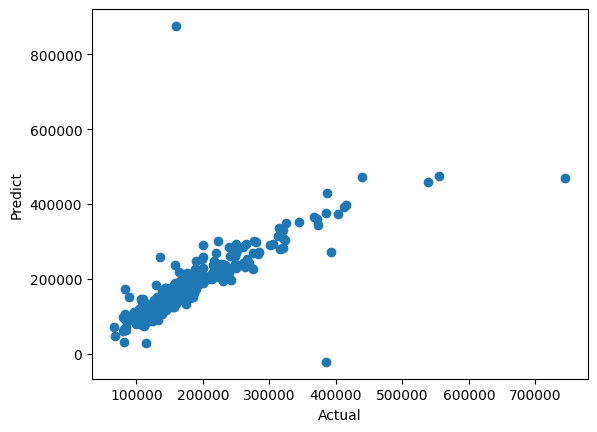

Linear Regression done


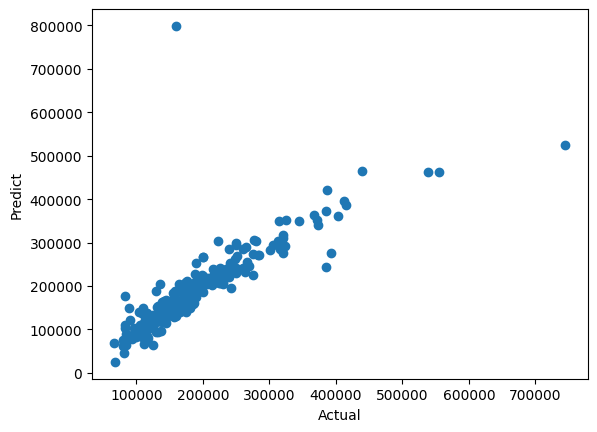

Ridge done


c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.527e+11, tolerance: 5.798e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+11, tolerance: 5.678e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

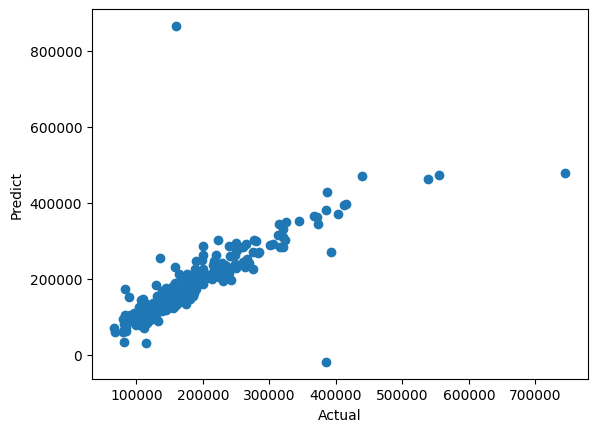

c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.832e+11, tolerance: 5.798e+08
  model = cd_fast.enet_coordinate_descent(


Lasso done


c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.774e+11, tolerance: 5.678e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+11, tolerance: 5.598e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

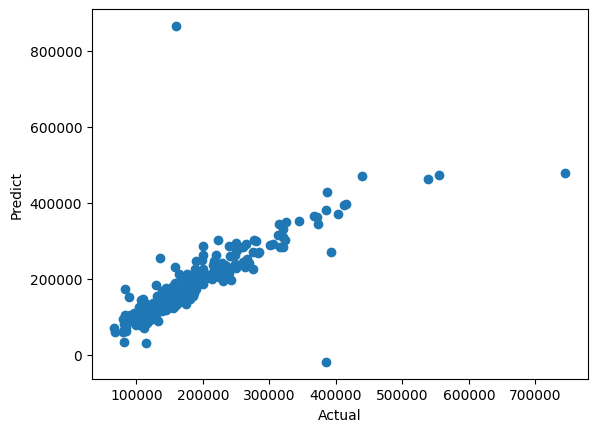

Elastic Net done


c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


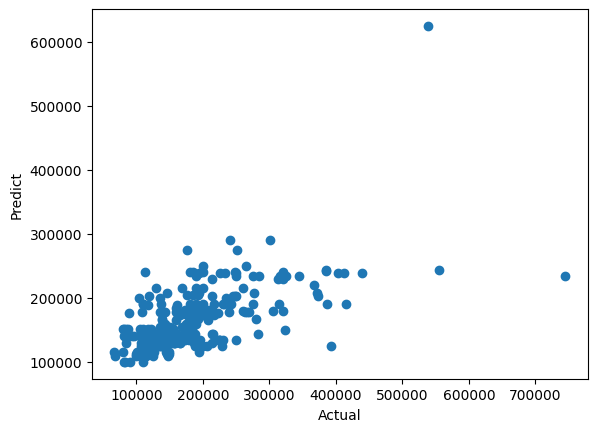

Logistic Regression done


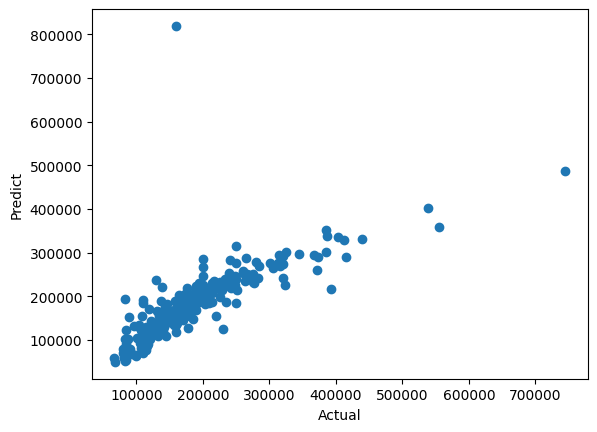

SVR done


c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_paramet

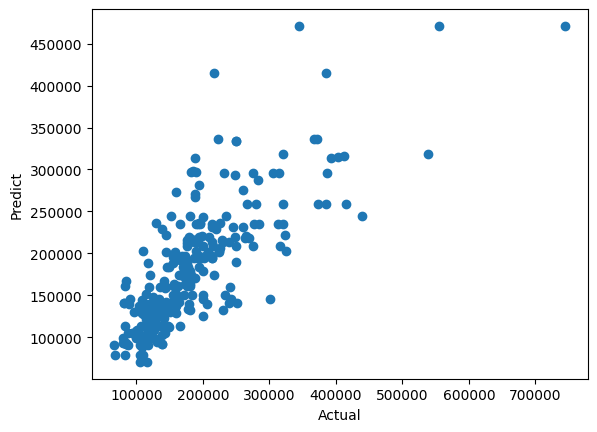

Decision Tree done


c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parame

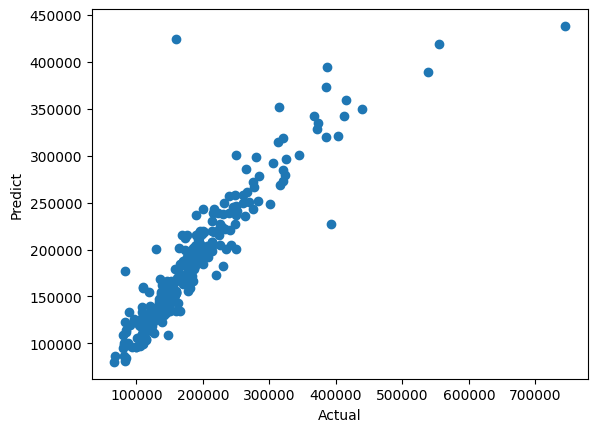

Random Forest done


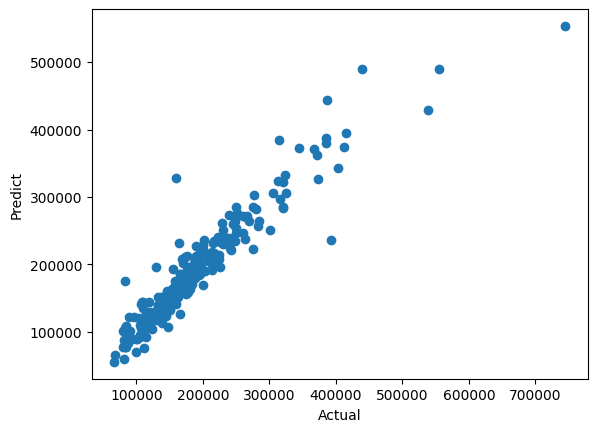

Gradient Boosting done


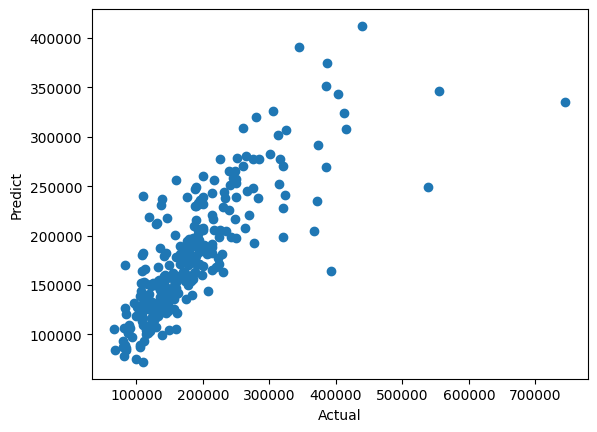

KNN done


In [675]:
# Chia tập train thành 2 phần: train và test
train, test = train_test_split(train_encoded, test_size=0.2, random_state=0)

# Tiến hành huấn luyện mô hình, Thêm các kết quả đánh giá mô hình vào một DataFrame
results = pd.DataFrame(columns=['Model', 'Params', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])
for model_name, model in models.items():
    if model_name in param_grid:
        best_params = find_best_params(model, param_grid[model_name], train.drop(columns='SalePrice'), train['SalePrice'])
        model.set_params(**best_params)
    model.fit(train.drop(columns='SalePrice'), train['SalePrice'])
    train_pred = model.predict(train.drop(columns='SalePrice'))
    test_pred = model.predict(test.drop(columns='SalePrice'))
    
    # Tạo một DataFrame mới cho mỗi lần lặp và nối nó với DataFrame kết quả
    new_result = pd.DataFrame({
        'Model': [model_name],
        'Params': [model.get_params()],
        'Train MSE': [mean_squared_error(train['SalePrice'], train_pred)],
        'Test MSE': [mean_squared_error(test['SalePrice'], test_pred)],
        'Train R2': [r2_score(train['SalePrice'], train_pred)],
        'Test R2': [r2_score(test['SalePrice'], test_pred)]
    })
    results = pd.concat([results, new_result], ignore_index=True)
    
    plot_result(test['SalePrice'], test_pred)
    print(f'{model_name} done')


In [676]:
results

,Model,Params,Train MSE,Test MSE,Train R2,Test R2
0,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",3.492875e+08,3.246183e+09,0.943269,0.529937
1,Ridge,"{'alpha': 2.0, 'copy_X': True, 'fit_intercept'...",4.288735e+08,2.221741e+09,0.930343,0.678281
2,Lasso,"{'alpha': 2.0, 'copy_X': True, 'fit_intercept'...",3.509633e+08,3.149390e+09,0.942997,0.543953
3,Elastic Net,"{'alpha': 2.0, 'copy_X': True, 'fit_intercept'...",3.509633e+08,3.149390e+09,0.942997,0.543953
4,Logistic Regression,"{'C': 1.0, 'class_weight': None, 'dual': False...",3.324607e+09,4.593221e+09,0.460025,0.334880
5,SVR,"{'C': 2.0, 'cache_size': 200, 'coef0': 0.0, 'd...",1.272093e+09,2.974313e+09,0.793390,0.569305
6,Decision Tree,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",1.022096e+09,2.711079e+09,0.833993,0.607423
7,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",1.258298e+08,1.253966e+09,0.979563,0.818420
8,Gradient Boosting,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",4.896884e+07,7.187103e+08,0.992047,0.895927
9,KNN,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",2.407962e+04,2.518339e+09,0.999996,0.635333


Dựa vào kết quả Test R2 có thể thấy được thuật toán có độ chính xác cao nhất là Gradient Boosting với R2 gần 0.9. 
Nhóm quyết định sẽ sử dụng thuật toán này với cái tham số trên để tiến hành dự đoán trên bộ dữ liệu test

In [677]:
# Lấy models Gradient Boosting trên để tiến hành dự đoán trên tập test
model = GradientBoostingRegressor()
paramerters = results[results['Model'] == 'Gradient Boosting']['Params']
model.set_params(**paramerters.values[0])
model.fit(train_encoded.drop(columns='SalePrice'), train_encoded['SalePrice'])
test_pred = model.predict(test_encoded)
test_df['SalePrice'] = test_pred
test_df[['Id', 'SalePrice']].to_csv('data/submission.csv', index=False)
